In [2]:
%matplotlib inline

In [11]:
path = "/home/ubuntu/nbs/data/dogscats.3/sample/"

In [6]:
from __future__ import division,print_function

import os, json
from glob import glob
import numpy as np
np.set_printoptions(precision=4, linewidth=100)
from matplotlib import pyplot as plt
import utils; reload(utils)
from utils import plots
import vgg16; reload(vgg16)
from vgg16 import Vgg16

In [18]:
batch_size=4

In [9]:
vgg = Vgg16()

In [19]:
batches = vgg.get_batches(path+'train', batch_size=batch_size)

Found 16 images belonging to 2 classes.


In [20]:
val_batches = vgg.get_batches(path+'valid', batch_size=batch_size)

Found 8 images belonging to 2 classes.


In [21]:
vgg.finetune(batches)

In [22]:
vgg.fit(batches, val_batches, nb_epoch=1)

Epoch 1/1
16/16 [==============================] - 0s - loss: 0.5525 - acc: 0.7500 - val_loss: 0.1878 - val_acc: 0.8750


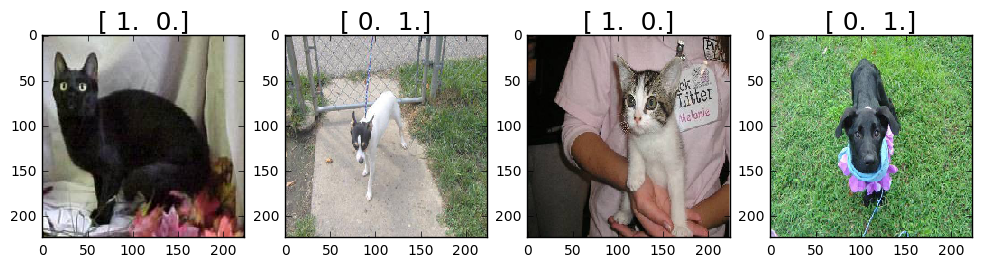

In [27]:
imgs,labels = next(batches)
plots(imgs, titles=labels)

In [29]:
next(batches)

(array([[[[ 189.,  189.,  189., ...,   93.,   85.,   72.],
          [ 189.,  189.,  189., ...,   64.,   63.,   61.],
          [ 191.,  191.,  191., ...,   63.,   73.,   82.],
          ..., 
          [  86.,   80.,  100., ...,  116.,   73.,   66.],
          [  75.,   61.,   95., ...,  102.,  140.,   99.],
          [ 114.,  106.,   80., ...,  111.,  147.,   99.]],
 
         [[ 226.,  226.,  226., ...,   93.,   80.,   83.],
          [ 226.,  226.,  226., ...,   64.,   58.,   72.],
          [ 226.,  226.,  226., ...,   63.,   70.,   93.],
          ..., 
          [  97.,   91.,  111., ...,  135.,   90.,   88.],
          [  90.,   76.,  110., ...,  124.,  158.,  124.],
          [ 131.,  123.,   96., ...,  132.,  166.,  126.]],
 
         [[ 255.,  255.,  255., ...,   95.,   77.,   69.],
          [ 255.,  255.,  255., ...,   66.,   55.,   58.],
          [ 254.,  254.,  254., ...,   63.,   65.,   79.],
          ..., 
          [  65.,   59.,   77., ...,   69.,   22.,   24.],
  